[詳解 ディープラーニング ~TensorFlow・Kerasによる時系列データ処理~](https://www.amazon.co.jp/dp/4839962510) に沿って動かしてみます

# 3章　ニューラルネットワーク（前半）


## 3.3 単純パーセプトロン

+ 82ページ 3.3.2実装～のコード（をベースにしたもの）
+ P83のコードでx1, x2という変数が出てくるが、P82(式3.15)のX=(x1,x2,,,)と混同するので、xg0,xg1と置き換える
+ モデル式：y = w1\*x1 + w2\*x2 +b

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#データの次元
d = 2
#各パターンのデータ数
N = 10
# ニューロンが発火するデータの平均値
mean = 5

# 乱数の結果を一定にするため、状態を定める（毎回同じ結果になる）
rng = np.random.RandomState(123)

# ２つのグループを乱数で生成する
# xg0:発火しないデータ＝平均０（0,0付近）
xg0 = rng.randn(N, d) + np.array([0, 0])
# xg1:発火するデータ＝平均５（meanで指定した数値） （mean,mean付近）
xg1 = rng.randn(N, d) + np.array([mean, mean])
print(xg0)
print(xg1)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]
 [ 1.49138963 -0.638902  ]
 [-0.44398196 -0.43435128]
 [ 2.20593008  2.18678609]
 [ 1.0040539   0.3861864 ]]
[[ 5.73736858  6.49073203]
 [ 4.06416613  6.17582904]
 [ 3.74611933  4.3622485 ]
 [ 5.9071052   3.5713193 ]
 [ 4.85993128  4.1382451 ]
 [ 4.74438063  2.20141089]
 [ 3.2284669   4.30012277]
 [ 5.92746243  4.82636432]
 [ 5.00284592  5.68822271]
 [ 4.12046366  5.28362732]]


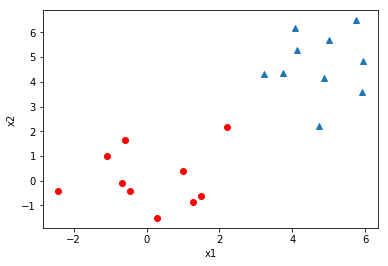

In [14]:
# xg0, xg1をプロットしてみる
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

In [15]:
# xg0とxg1を連結して１つのデータにする
x = np.concatenate((xg0, xg1), axis = 0)
print(x)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]
 [ 1.49138963 -0.638902  ]
 [-0.44398196 -0.43435128]
 [ 2.20593008  2.18678609]
 [ 1.0040539   0.3861864 ]
 [ 5.73736858  6.49073203]
 [ 4.06416613  6.17582904]
 [ 3.74611933  4.3622485 ]
 [ 5.9071052   3.5713193 ]
 [ 4.85993128  4.1382451 ]
 [ 4.74438063  2.20141089]
 [ 3.2284669   4.30012277]
 [ 5.92746243  4.82636432]
 [ 5.00284592  5.68822271]
 [ 4.12046366  5.28362732]]


In [16]:
#モデル定義
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w, x) + b)

def step(x):
    return 1 * (x > 0)

# 正しい出力値を返す関数
def t(i):
    if i < N:
        return 0
    else:
        return 1

# 学習前の初期値
print("w:", w)
print("b:", b)

w: [ 0.  0.]
b: 0


In [17]:
# 学習実施
epoc = 1
while True:
    classified = True
    #for i in range(N * 2):
    for i in range(len(x)):
        print("epoc:%03d" % (epoc))
        print(" data:%02d, x:%s, w:%s, b:%d, y:%d, t:%d" % (i, str(x[i]), str(w), b, y(x[i]), t(i)))
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
        print("           delta_w:%s, delta_b:%d, classified:%d" % (str(delta_w), delta_b, classified))
        epoc += 1
    if classified:
        print("**** ALL DATA CLASSIFIED CORRECTLY ****")
        break
    print("--- ALL DATA NOT CLASSIFIED CORRECTLY. ONE MORE LOOP ---")

epoc:001
 data:00, x:[-1.0856306   0.99734545], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:002
 data:01, x:[ 0.2829785  -1.50629471], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:003
 data:02, x:[-0.57860025  1.65143654], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:004
 data:03, x:[-2.42667924 -0.42891263], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0. -0.], delta_b:0, classified:1
epoc:005
 data:04, x:[ 1.26593626 -0.8667404 ], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:006
 data:05, x:[-0.67888615 -0.09470897], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0. -0.], delta_b:0, classified:1
epoc:007
 data:06, x:[ 1.49138963 -0.638902  ], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:008
 data:07, x:[-0.44398196 -0.43435128], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0

 data:19, x:[ 4.12046366  5.28362732], w:[ 2.44219887  2.99745547], b:-6, y:1, t:1
           delta_w:[ 0.  0.], delta_b:0, classified:0
--- ALL DATA NOT CLASSIFIED CORRECTLY. ONE MORE LOOP ---
epoc:081
 data:00, x:[-1.0856306   0.99734545], w:[ 2.44219887  2.99745547], b:-6, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:082
 data:01, x:[ 0.2829785  -1.50629471], w:[ 2.44219887  2.99745547], b:-6, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:083
 data:02, x:[-0.57860025  1.65143654], w:[ 2.44219887  2.99745547], b:-6, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:084
 data:03, x:[-2.42667924 -0.42891263], w:[ 2.44219887  2.99745547], b:-6, y:0, t:0
           delta_w:[-0. -0.], delta_b:0, classified:1
epoc:085
 data:04, x:[ 1.26593626 -0.8667404 ], w:[ 2.44219887  2.99745547], b:-6, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:086
 data:05, x:[-0.67888615 -0.09470897], w:[ 2.44219887  2.99745547],

In [18]:
# 学習した結果の値
print("w:", w)
print("b:", b)

w: [ 2.14037745  1.2763927 ]
b: -9


+ 学習した結果、w1=2.14037745、w2=1.2763927、b=-9が得られた
+ モデル式：y = w1*x1 + w2*x2 +b　→ 0 = 2.14037745*x1 + 1.2763927*x2 -9 がニューロンが発火するかどうかの境界線

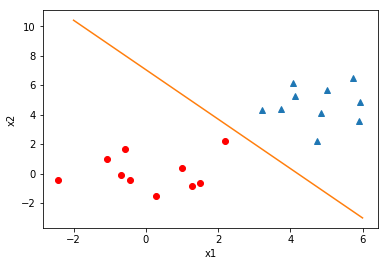

In [19]:
#もう一度xg0, xg1をプロット
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

#算出した値で境界線を描画
#x1の値域 -2から6まで4点（x1の範囲に合わせる。描画する数は適当でOK）
x1 = np.linspace(-2,6,4)
x2 = -(2.14037745 / 1.276392) * x1 + (9.0 / 1.276392)
plt.plot(x1, x2, "-")

## 3.4 ロジスティック回帰



In [20]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#モデル設定
tf.set_random_seed(0)

w = tf.Variable(tf.zeros([2,1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x,w) + b)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


# 予測値yが0.5以上なら1、0.5未満なら0　<->ｔの値（1/0）と比較する
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)


(-1, 2)

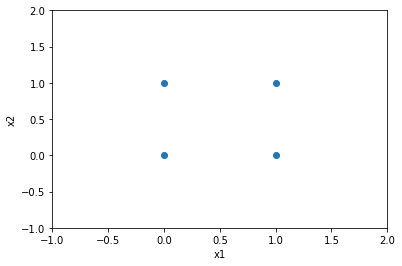

In [21]:
# ORゲートのデータ

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],   [1],   [1],   [1]])

# 散布図でプロットしてみる
plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1, 2)
plt.ylim(-1, 2)


In [22]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 学習
for epoch in range(200):
    sess.run(train_step, feed_dict={
        x:X, t:Y
    })


# 学習結果
result_w = sess.run(w)
result_b = sess.run(b)
print("w", result_w)
print("b", result_b)


w [[ 3.61188436]
 [ 3.61188436]]
b [-1.24509501]


classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]


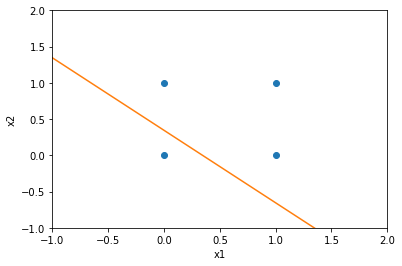

In [23]:
# 学習結果の確認
classified = correct_prediction.eval(session=sess, feed_dict={
    x:X, t:Y
})

prob = y.eval(session=sess, feed_dict={
    x: X
})
print("classified:")
print(classified)
print()
print("output probability:")
print(prob)


# 学習結果の境界線をプロット
# w1*x1 + w2*x2 + b = 0
# x2 = - w1*x1/w2 -(b/w2)
plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1, 2)
plt.ylim(-1, 2)

x1 = np.linspace(-1,2,4)
x2 = -(result_w[0] * x1 )/ result_w[1] - (result_b / result_w[1])
plt.plot(x1, x2, "-")


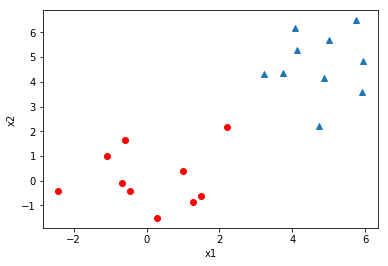

In [24]:
#
#単純パーセプトロンと同じデータでやってみる
#
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import zscore

#単純パーセプトロンと同じデータを使用する
d = 2
N = 10
mean = 5
rng = np.random.RandomState(123)
xg0 = rng.randn(N, d) + np.array([0, 0])
xg1 = rng.randn(N, d) + np.array([mean, mean])
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

In [25]:
'''
モデル設定
'''
tf.set_random_seed(0)  # 乱数シード

w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)



(20, 2)
(20, 1)


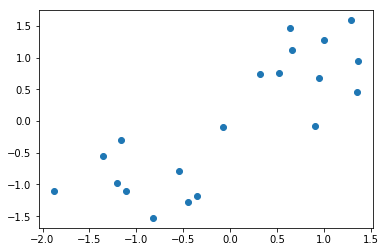

In [26]:
#データセット
# xのshape=[None, 2]に合わせる
X = np.concatenate((xg0, xg1), axis = 0)
print(X.shape)
# tのshape=[None, 1]に合わせる
yg0 = np.zeros((N,1))
yg1 = np.ones((N,1))
#print(yg0)
#print(yg1)
Y = np.concatenate((yg0, yg1), axis = 0)
print(Y.shape)

# 一旦Xの元データを表示
#print(X)
# Xを標準化する
ZX = zscore(X)
#print(ZX)

plt.plot(ZX[:,0],ZX[:,1],"o")

In [27]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# 学習
for epoch in range(20):
    sess.run(train_step, feed_dict={
        x: ZX,
        t: Y
    })
    #print("epoc:" ,epoch)
    #print("   w:" ,sess.run(w))
    #print("   b:" ,sess.run(b))


print("**** train finish ****")
print("w:" ,sess.run(w))
print("b:" ,sess.run(b))


**** train finish ****
w: [[ 2.48212171]
 [ 2.31618047]]
b: [-0.19245674]


[ 2.48212171]
[ 2.31618047]
[-0.19245674]


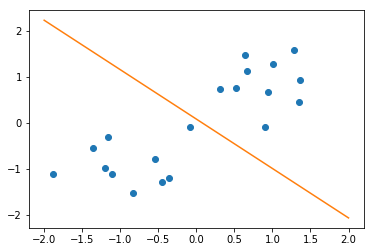

In [28]:
# 学習結果を境界線ひいてみる
result_w1 = sess.run(w)[0]
result_w2 = sess.run(w)[1]
result_b = sess.run(b)

print(result_w1)
print(result_w2)
print(result_b)

plt.plot(ZX[:,0],ZX[:,1],"o")
# 0 = w1 x1 + w2 x2 + b
x1 = np.linspace(-2,2,2)
x2 = -(result_w1 * x1 )/ result_w2 - (result_b / result_w2)
plt.plot(x1, x2, "-")

In [29]:
'''
学習結果の確認
'''
classified = correct_prediction.eval(session=sess, feed_dict={
    x: ZX,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: ZX
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[  7.80767668e-03]
 [  3.06516327e-03]
 [  2.26042103e-02]
 [  5.97441278e-04]
 [  1.39070284e-02]
 [  4.32978105e-03]
 [  2.10658703e-02]
 [  3.99792287e-03]
 [  3.53722662e-01]
 [  3.28084454e-02]
 [  9.98744369e-01]
 [  9.91704583e-01]
 [  9.44907784e-01]
 [  9.85366940e-01]
 [  9.76167917e-01]
 [  8.64690602e-01]
 [  9.07844663e-01]
 [  9.95326042e-01]
 [  9.94768977e-01]
 [  9.82594192e-01]]
